## Tensorflow介绍

当需要额外的控制来编写自定义损失函数、自定义指标、层、模型、初始化程序、正则化函数、权重约束等时，研究Tensorflow的其他底层API很有用。有时候可能需要完全控制训练循环，例如对梯度使用特殊的变换或约束（不仅仅对它们进行裁剪），或者对网络的不同部分使用多个优化器。还将探讨如何使用TensorFlow的自动图形生成功能来增强自定义模型和训练算法

Tensorflow：
- 它的核心与NumPy非常相似，但支持GPU。
- 它支持分布式计算（跨多个设备和服务器）。·
- 它包含一种即时(JIT)编译器，可使其针对速度和内存使用情况来优化计算。它的工作方式是从Python函数中提取计算图，然后进行优化（通过修剪未使用的节点），最后有效地运行它（通过自动并行运行相互独立的操作）。
- 计算图可以导出为可移植格式，因此可以在一个环境中（例如在Linux上使用Python）训练TensorFlow模型，然后在另一个环境中（例如在Android设备上使用Java）运行TensorFlow模型。
- 它实现了反向模式的自动微分(autodiff) 并提供了一些优秀的优化器，例如RMSProp和Nadam，因此可以轻松地最小化各种损失函数。

TensorFlow在这些核心功能的基础上提供了更多功能：最重要的当然是Keras， 但它还具有数据加载和预处理操作（tf.data、tf.io等）​，以及图像处理操作(tf.image)和信号处理操作(tf.signal)

<img alt="Tensorflow的Python API" height="500" src="./images/tensorflow/p1.jpg" width="500"/>

在底层，每个TensorFlow操作（以下简称op）都是使用高效的C++代码实现的。许多操作都有称为内核的多种实现：每个内核专用于特定的设备类型，例如CPU、GPU甚至TPU（张量处理单元）。GPU可以通过将整个计算分成许多较小的块并在多个GPU线程中并行运行它们来极大地加快计算速度。TPU甚至更快：它们是专门为深度学习操作而构建的定制ASIC芯片

Tensforflow大多数时候，使用高层API（尤其是Keras和tf.data), 当需要更大的灵活性时，则可以使用较低层的PythonAPI，直接处理张量

TensorFlow不仅可以在Windows、Linux和macOS上运行，还可以在移动设备上运行（使用TensorFlow Lite），包括在iOS和Android设备上。

如果不想使用Python API，也可以使用其他语言的API，例如C++、Java和Swift API。甚至还有一个名为TensorFlow.js的JavaScript实现，可以直接在浏览器中运行模型。

<img alt="Tensorflow的架构" height="500" src="./images/tensorflow/p2.jpg" width="500"/>

## 像NumPy一样使用Tensorflow

TensorFlow的API围绕张量展开，张量从一个操作流向另一个操作，因此得名TensorFlow。张量与NumPy ndarray非常相似：

它通常是一个多维数组，但也可保存标量（数值）。当创建自定义代价函数、自定义指标、自定义层等时，这些张量将非常重要。

### 张量和操作

In [2]:
import tensorflow as tf

t = tf.constant([[1.,2.,3.],
                 [4.,5.,6.]])  # tf.constant创建张量
t
t.shape
t.dtype
type(t)
#
tf.constant(100)

<tf.Tensor: shape=(), dtype=int32, numpy=100>

In [3]:
t[:, 1:]
t[..., 1, tf.newaxis]
t[0,1]

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [4]:
# 各种张量操作
t + 10
tf.add(t, 10)
tf.square(t)
t @ tf.transpose(t)
tf.matmul(t, tf.transpose(t))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [5]:
# tf.squeeze, tf.reduce_mean, tf.reduce_sum, tf.reduce_max, tf.math.log
# 构造一个简单的张量
x = tf.constant([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0]])

print("原始张量 x:")
print(x.numpy())

# 1. tf.squeeze：去掉维度为1的维度
x_expand = tf.expand_dims(x, axis=0)   # shape (1, 2, 3)
print("\n扩展后张量形状:", x_expand.shape)
print("squeeze之后:", tf.squeeze(x_expand).shape)

# 2. tf.reduce_mean：求均值
mean_all = tf.reduce_mean(x)                 # 所有元素的平均值
mean_axis0 = tf.reduce_mean(x, axis=0)       # 按列求均值
print("\nreduce_mean 所有元素:", mean_all.numpy())
print("reduce_mean 按列:", mean_axis0.numpy())
#
# 3. tf.reduce_sum：求和
sum_all = tf.reduce_sum(x)
sum_axis1 = tf.reduce_sum(x, axis=1)         # 按行求和
print("\nreduce_sum 所有元素:", sum_all.numpy())
print("reduce_sum 按行:", sum_axis1.numpy())
#
# 4. tf.reduce_max：最大值
max_all = tf.reduce_max(x)
max_axis0 = tf.reduce_max(x, axis=0)
print("\nreduce_max 所有元素:", max_all.numpy())
print("reduce_max 按列:", max_axis0.numpy())
#
# 5. tf.math.log：自然对数
log_x = tf.math.log(x)
print("\nlog(x):")
print(log_x.numpy())

原始张量 x:
[[1. 2. 3.]
 [4. 5. 6.]]

扩展后张量形状: (1, 2, 3)
squeeze之后: (2, 3)

reduce_mean 所有元素: 3.5
reduce_mean 按列: [2.5 3.5 4.5]

reduce_sum 所有元素: 21.0
reduce_sum 按行: [ 6. 15.]

reduce_max 所有元素: 6.0
reduce_max 按列: [4. 5. 6.]

log(x):
[[0.        0.6931472 1.0986123]
 [1.3862944 1.609438  1.7917595]]


许多函数和类都有别名。例如，tf.add()和tf.math.add()是相同的函数。这允许TensorFlow为常见的操作提供简洁的名称

tf.transpose()函数的功能与NumPy的T属性完全不相同：在TensorFlow中，使用自己的转置数据副本创建一个新的张量，而在NumPy中，t.T只是相同数据的转置视图。类似地，tf.reduce_sum()之所以这样命名，是因为其GPU内核（即GPU实现）使用的reduce算法不能保证元素添加的顺序：32位浮点数的精度有限，因此每次调用此操作时，结果可能会稍有不同。tf.reduce_mean()也是如此（当然，tf.reduce_max()是确定性的

### 张量和NumPy

张量可以与NumPy配合使用：可以用NumPy数组创建张量，反之亦然。也可以将TensorFlow操作应用于NumPy数组，将NumPy操作应用于张量

In [6]:
import numpy as np

a = np.array([2.,4.,5.])
tf.constant(a)
t.numpy()  # np.array(t)
tf.square(a)
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

### 类型转换

类型转换会严重影响性能，并且自动完成的类型转换很容易被忽视。为了避免这种情况，TensorFlow不会自动执行任何类型转换：如果对不兼容类型的张量执行此操作，会引发异常。例如，不能把浮点数张量和整数张量相加，甚至不能将32位浮点数和64位浮点数相加：

In [7]:
# tf.constant(2.) + tf.constant(40)
# tf.constant(2.) + tf.constant(40., dtype=tf.float64)

t2 = tf.constant(40, dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, tf.float32) # 确实需要转换类型时，使用tf.cast()

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

### 变量

tf.constant创建的Tensor值是不变的：无法修改它们。这意味着不能使用常规张量在神经网络中表示权重，因为它们需要通过反向传播进行调整。

另外，还可能需要随时间改变其他参数（例如动量优化器跟踪过去的梯度）。需要tf.Variable：

In [8]:
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

tf.Variable的行为与tf.Tensor的行为非常相似：可以使用它执行相同的操作，它在NumPy中也可以很好地发挥作用，并且对类型也很挑剔。但是，它也可以使用assign()方法（或assign_add()与assign_sub()，给变量增加或减少给定值）进行修改。

还可以通过单元（或切片）的assign()方法（直接指定将不起作用）或者使用scatter_update()或scatter_nd_update()方法来修改单个单元（或切片），但直接赋值将不起作用

In [9]:
# 变量赋值
v.assign(2*v)
v
v[0,1].assign(42)
v[:,2].assign([0., 1.])
v.scatter_nd_update(indices=[[0,0], [1,2]], updates=[100., 200.])


# v[1] = [7.,8.,9.] # 直接赋值不起作用
v[1].assign([7,8,9])



<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  7.,   8.,   9.]], dtype=float32)>

In [10]:
observation = np.array([111.0, 188.0])
codes = np.array([[102.0, 203.0],
               [132.0, 193.0],
               [45.0, 155.0],
               [57.0, 173.0]])

np.argmin(np.sqrt(np.sum((observation - codes)**2, axis=1)))
# 找到codes里 距离observation最近的codes索引（位置），使用Tensor实现

observation = tf.constant(observation)
codes = tf.constant(codes)

tf.argmin(tf.reduce_sum(tf.square(tf.subtract(observation, codes)), axis=1))

<tf.Tensor: shape=(), dtype=int64, numpy=0>

## 自定义模型和训练算法

### 自定义损失函数

场景：数据集在删除/修复异常值后仍然有噪声。均方误差可能会对大误差惩罚太多，而导致模型不精确。平均绝对误差不会对异常值惩罚太多，但是训练可能需要一段时间才能收敛，并且训练后的模型可能不太精确。这可能是使用Huber损失而不是MSE的好时机。Huber损失已在Keras中实现（只需使用tf.keras.losses.Huber类的一个实例），但假设它不存在。要实现它，只需创建一个函数，将标签和模型的预测结果作为参数，并使用TensorFlow操作来计算包含所有损失的张量（每个样本一个）

In [11]:
def huber_fn(y_true, y_pred):
    # y_true: (m,), Tensor
    # y_pred: (m,), Tensor

    # 返回 (m,) 损失值 ，Tensor
    error = y_true - y_pred

    # 想从Tensorflow框架的优化功能中受益，应仅使用Tensorflow操作
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

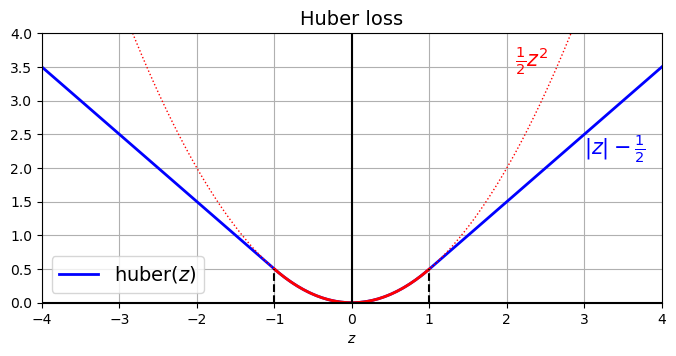

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [14]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [15]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.4858 - mae: 0.8357 - val_loss: 0.3479 - val_mae: 0.6527
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2415 - mae: 0.5419 - val_loss: 0.2630 - val_mae: 0.5473


### 保存和加载包含自定义组件的模型

保存包含自定义损失函数的模型很方便，直接保存；但加载它时，需要将名称映射到对象

In [16]:
model.save("./models/my_model_with_a_custom_loss.keras")

In [17]:
model = tf.keras.models.load_model("./models/my_model_with_a_custom_loss.keras", custom_objects={"huber_fn": huber_fn})

# 如果用@keras.utils.register_keras_serializable()修饰 huber_fn()函数，它将自动可供load_model()函数使用，无须将其包含在custom_objects字典中

In [18]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2065 - mae: 0.4930 - val_loss: 0.2173 - val_mae: 0.4919
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1906 - mae: 0.4709 - val_loss: 0.1978 - val_mae: 0.4725


In [19]:
# 想要不同的误差阈值，创建函数，让该函数创建已配置的损失函数
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [20]:
# 保存模型时，上述方式定义的阈值不会保存
# 创建tf.keras.losses.Loss类的子类， 实现get_config() 自定义要保存的配置
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}  # base_config | {"threshold":self.threshold}

In [21]:
# {**{"one":1, "three":3}, "two":2}
{"one":1, "three":3}  | {"two": 2}

{'one': 1, 'three': 3, 'two': 2}

构造函数接受**kwargs并将它们传递给父类构造函数，该父类构造函数处理标准超参数：损失的名称和用于聚合单个实例损失的归约算法。

call()方法获取标签和预测结果，计算所有实例损失，然后将其返回。

get_config()方法返回一个字典，将每个超参数名称映射到其值。它首先调用父类的get_config()方法，然后将新的超参数添加到此字典中

In [22]:
model.compile(loss=HuberLoss(2.), optimizer="nadam")  # 编译使用损失类的实例
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2065 - val_loss: 0.2170
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1989 - val_loss: 0.1984


In [23]:
model.save("./models/my_model_with_a_custom_class.keras") # 当保存模型时，Keras会调用损失实例的get_config()方法，并将配置以SavedModel格式保存

In [24]:
model = tf.keras.models.load_model("./models/my_model_with_a_custom_class.keras", custom_objects={"HuberLoss": HuberLoss}) # 加载模型时，它在HuberLoss类上调用from_config()类方法：此方法由基类(Loss)实现，并创建该类的实例，将**config传递给构造函数。
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.1933 - val_loss: 0.1788
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1900 - val_loss: 0.2234


In [25]:
model.loss
model.loss.threshold

2.0

### 自定义激活函数，初始化，正则化和约束

多数Keras功能，例如损失、正则化、约束、初始化、指标、激活函数、层甚至完整模型，都可以以几乎相同的方式进行自定义。在大多数情况下，只需要编写带有适当输入和输出的简单函数即可。以下是自定义激活函数（等同于tf.keras.activations.softplus()或tf.nn.softplus()）、自定义Glorot初始化（等同于tf.keras.initializers.glorot_normal()）、自定义l1正则化（等同于tf.keras.regularizers.l1(0.01)），以及确保权重均为正的自定义约束（相当于tf.keras.constraints.nonneg()或tf.nn.relu()）：

In [26]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))


def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01*weights))

def my_positive_weights(weights):
    return tf.where(weights < 0, tf.zeros_like(weights), weights)  # tf.nn.relu(weights)

# 这些函数接收什么参数，取决于自定义函数的类型

In [27]:
layer = tf.keras.layers.Dense(1,  kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer, kernel_constraint=my_positive_weights)  # 只要参数和返回值能对上，可以正常使用这些自定义函数

1. 自定义出 he初始化 （normal/uniform)
2. 自定义出 l2正则化
3. 自定义 swish / relu

用自定义这些组件 去构建Dense层， 然后训练一下数据试试

In [28]:
def my_l2_regularizer(weights):
    return tf.reduce_sum(0.01*tf.square(weights))

def my_relu(z):
    return tf.nn.relu(z)

def my_he_normal(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / shape[0])
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation=my_relu, kernel_initializer=my_he_normal, kernel_regularizer=my_l2_regularizer,input_shape=input_shape),
    layer
])

model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.9486 - mae: 0.8319 - val_loss: 0.6649 - val_mae: 0.6471
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4955 - mae: 0.5545 - val_loss: 0.4211 - val_mae: 0.5295


激活函数将应用于此密集层的输出，其结果将传递到下一层。层的权重将使用初始化程序返回的值进行初始化。在每个训练步骤中，将权重传递给正则化函数以计算正则化损失，并将其添加到主损失中以得到用于训练的最终损失。最后，在每个训练步骤之后，将调用约束函数，并将层的权重替换为约束权重。

如果函数具有需要与模型一起保存的超参数，那么需要继承适当的类，例如tf.keras.regularizers.Regularizer、tf.keras.constraints.Constraint、tf.keras.initializers.Initializer或tf.keras.layers.Layer（适用于任何层，包括激活函数）。就像自定义损失时所做的一样，这是一个用于l1正则化的简单类，它保存了其factor超参数

In [29]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        # 不需要调用父类构造函数或get_config()方法，因为它们不是由父类定义的
        return {"factor": self.factor}

# 注意：必须为损失，层（包括激活函数）和模型实现call方法，或者为正则化，初始化和约束实现__call__()方法。

### 自定义指标

损失和指标在概念上不是一回事：损失（例如交叉熵）被梯度下降用来训练模型，因此它们必须是可微的（至少在评估它们的点上），并且梯度除了局部最小值不应为0。另外，即使人类不容易解释它们也没有问题。

相反，指标（例如精度）用于评估模型：它们必须更容易被解释，并且可以是不可微的，在各处也可以具有0梯度。

在大多数情况下，定义自定义指标函数与定义自定义损失函数完全相同。实际上，甚至可以将之前创建的Huber损失函数用作指标。

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])


model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.3637 - huber_fn: 0.7583
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 1.2146 - huber_fn: 0.3773


对于训练期间的每一个批次，Keras都会计算该指标并跟踪自轮次0以来的均值，但有的时候不想要这样的效果

例如，考虑一个二元分类器的准确率。精确率是真阳性的数量除以阳性预测结果（包括真阳性和假阳性）的数量。假设该模型在第一个批次中预测了5个阳性结果，其中4个是正确的：即80%的精确率。假设该模型在第二个批次中预测了3个阳性结果，但它们都是不正确的：准确率为0%。如果仅计算这两个准确率的均值，则可以得到40%。但是，这并不是模型在这两个批次上的准确率！实际上，在8个(5+3)阳性预测结果中，总共有4个(4+0)真阳性，因此总体准确率为50%，而不是40%。

需要的是一个对象，它应该可以跟踪真阳性的数量和假阳性的数量，并可以在请求时根据这些数据计算准确率。这正是tf.keras.metrics.Precision类所做的

In [31]:
# 流式评价
precision = tf.keras.metrics.Precision()  # 创建了一个Precision对象，然后将其用作函数

# 将第一个批次的标签和预测结果以及第二个批次的标签和预测结果传递给它
precision([0,1,1,1,0,1,0,1], [1,1,0,1,0,1,0,1])
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

#
#  调用result()方法来获取指标的当前值。使用variables属性查看其变量（跟踪真阳性和假阳性的数量），并使用reset_states()方法重置这些变量：
precision.result()
precision.variables
precision.reset_state()

In [32]:
precision.result()
precision.variables

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [33]:
# 自定义流式指标，创建tf.keras.metrics.Metric类的子类
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)


        self.total = self.add_weight(name="total", initializer="zeros") # tf.Variable(0, dtype=tf.float32)
        self.count = self.add_weight(name="count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))  # self.total = self.total + tf.reduce_sum(sample_metrics)
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32)) # self.count = self.count + len(y_true)

    def result(self):
        # return tf.divide(self.total, self.count)
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}



In [34]:
class MyPrecision(tf.keras.metrics.Metric):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

        self.true_positives = self.add_weight(name="true_positives", initializer="zeros")
        self.false_positives = self.add_weight(name="false_positives", initializer="zeros")

    def update_state(self, y_true, y_pred):
        total_pred_positives = tf.cast(tf.reduce_sum(y_pred), tf.float32)
        true_positives = tf.reduce_sum(tf.multiply(tf.cast(y_true, tf.float32), tf.cast(y_pred, tf.float32)))
        self.true_positives.assign_add(true_positives)
        self.false_positives.assign_add(total_pred_positives - true_positives)

    def result(self):
        if tf.equal(self.true_positives + self.false_positives, 0):
            return self.true_positives
        return self.true_positives / (self.true_positives + self.false_positives)

In [35]:
m = MyPrecision()

m(tf.constant([0,1,1,1,0,1,0,1]), tf.constant([1,1,0,1,0,1,0,1]))
m([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

- 构造函数使用add_weight()方法创建用于跟踪多个批次的指标状态所需的变量，在本例中，这些变量包括所有Huber损失的总和(total)以及到目前为止看到的实例数(count)。
- 也可以手动创建变量。Keras会跟踪任何设置为属性的tf.Variable（一般而言，指任何“可跟踪”的对象，例如层或模型）。
- 当使用此类的实例作为函数时（像对Precision对象所做的那样），将调用update_state()方法。给定一个批次的标签和预测结果，它会更新变量。
- result()方法计算并返回最终结果，在本例中为所有实例的平均Huber损失。当使用指标作为函数时，首先调用update_state()方法，然后调用result()方法，并返回其输出。
- 还实现了get_config()方法来确保阈值与模型一起被保存。
- reset_states()方法的默认实现将所有变量重置为0.0（但是可以根据需要覆盖它）。

当使用简单的函数定义指标时，Keras会自动为每个批次调用该指标，它会跟踪每个轮次的均值，因此HuberMetric类的唯一好处是保存阈值。

但是，某些指标（如精确率）不能简单地按批次平均：在这些情况下，除了实现流式指标之外，别无选择。

Keras的可跟踪机制：keras会自动收集自定义类（比如层/模型）的可跟踪对象（比如变量），放进父类的 变量列表（layer.trainable_variables / layer.non_trainable_variables）。

这样的作用是：

1. 参数能被自动训练

* 当你调用 `model.compile(..., optimizer=...)` 并训练时，优化器会去找 `model.trainable_variables`。
* 因为 Keras 已经把子层的变量挂到父层上，所以优化器也能“看到”子层的权重并更新它们。
  否则，子层的参数就不会被训练。

2. 保存 / 加载模型时参数不会丢

* 当调用 `model.save()` 或 `model.get_weights()` 时，Keras 会把所有层（包括嵌套子层）的参数序列化。  序列化：内存的对象 转成 可被被保存到磁盘/数据库/网络传输的二进制形式
* 这依赖于刚才那个“变量列表”，否则模型恢复时，子层权重可能不在里面。

3. 方便层级管理

* 可以直接访问父层的 `.variables` 或 `.summary()`，会自动列出子层的参数。
* 这对调试和可视化很方便。

**总结**：
“添加到该层的变量列表里”就是保证 优化器能更新它们，模型能保存/恢复它们，用户能统一管理它们 —— 这是 Keras 的“可跟踪机制”。


In [36]:
m = HuberMetric(2.)
#  squared_loss = tf.square(error) / 2
#  linear_loss = self.threshold * tf.abs(error) - self.threshold**2 / 2

# total = 2 * |10 - 2| - 2²/2 = 14
# count = 1
# result = 14 / 1 = 14
m(tf.constant([[2.]]), tf.constant([[10.]]))

<tf.Tensor: shape=(), dtype=float32, numpy=14.0>

In [37]:
# total = total + (|1 - 0|² / 2) + (2 * |9.25 - 5| - 2² / 2) = 14 + 7 = 21
# count = count + 2 = 3
# result = total / count = 21 / 3 = 7
m(tf.constant([[0.], [5.]]), tf.constant([[1.], [9.25]]))

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

In [38]:
m.result()
m.variables
#
m.reset_state()
m.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

In [39]:
# 检查自定义指标正常运行
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [40]:
model.compile(loss=create_huber(2.0), optimizer="nadam",
              metrics=[HuberMetric(2.0)])
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 1.0514 - huber_metric_1: 1.0514
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.3152 - huber_metric_1: 0.3152


In [41]:
model.save("./models/my_model_with_a_custom_metric.keras")

In [42]:
model = tf.keras.models.load_model(
    "./models/my_model_with_a_custom_metric.keras",
    custom_objects={
        "huber_fn": create_huber(2.0),
        "HuberMetric": HuberMetric
    }
)

In [43]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2527 - huber_metric_1: 0.2527
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2270 - huber_metric_1: 0.2270


In [44]:
# 也可以这样自定义指标，这个类对形状处理更好，支持样本权重
class HuberMetric(tf.keras.metrics.Mean):
    def __init__(self, threshold=1.0, name='HuberMetric', dtype=None):
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        super().__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        super(HuberMetric, self).update_state(metric, sample_weight)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [46]:
model.compile(loss=tf.keras.losses.Huber(2.0), optimizer="nadam",
              weighted_metrics=[HuberMetric(2.0)])

sample_weight = np.random.rand(len(y_train))
print(sample_weight)
history = model.fit(X_train_scaled, y_train, epochs=2,
                    sample_weight=sample_weight)

[0.37454012 0.95071431 0.73199394 ... 0.16710009 0.0333932  0.38571671]
Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2695 - HuberMetric: 0.5431
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1474 - HuberMetric: 0.2970


In [47]:
print(history.history["loss"][0],
 history.history["HuberMetric"][0] * sample_weight.mean())  # todo: 为什么这两个值接近

model.save("./models/my_model_with_a_custom_metric_v2.keras")

0.26950663328170776 0.2695066773642387


In [48]:
model = tf.keras.models.load_model("./models/my_model_with_a_custom_metric_v2.keras",
                                   custom_objects={"HuberMetric": HuberMetric})

In [49]:
model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.2418 - HuberMetric: 0.2418
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2143 - HuberMetric: 0.2143


### 自定义层

想构建一个架构，其中包含TensorFlow未提供默认实现的奇异层。或者可能只是想构建一个具有重复结构的架构（其中特定的层块重复多次），将每个块视为一个层会很方便。

对于这种情况需要构建一个自定义层。

有些层没有权重，例如tf.keras.layers.Flatten或tf.keras.layers.ReLU。如果想创建一个没有任何权重的自定义层，最简单的方法是编写一个函数并将其包装在tf.keras.layers.Lambda层中。例如，以下的层将对其输入应用指数函数：

In [50]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x)) # 可以通过顺序API，函数式API或子类化API 像其他层一样使用此自定义层

In [51]:
exponential_layer(tf.constant([-1., 0., 1.])) #  # 像其他层对象那样，可以当成函数使用

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

In [52]:
# 如果要预测的值为正数且尺度差异很大（例如 0.001、10、10000），则在回归模型的输出处添加指数层会很有用。
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

# 事实上，指数函数是Keras中的标准激活函数之一，可以用activation="exponential"


Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 0.5863 - val_loss: 0.3901
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.7664 - val_loss: 0.3872
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4246 - val_loss: 0.3581
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.6361 - val_loss: 0.4369
Epoch 5/5
162/162 [==============================] - 0s 971us/step - loss: 0.4030


0.4030041992664337

In [53]:
# 自定义有状态的层（具有权重的层），需要创建tf.keras.layers.Layer类的子类

# Dense层的简化自定义实现  # 形状 输出的长度，激活函数， W， b

class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units  # units 输出的数量 （这个时候还不知道输入有几个神经元）
        self.activation = tf.keras.activations.get(activation)  # 字符串 获取到 字符串对应的激活函数

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.units],
            initializer="glorot_normal")
        self.bias = self.add_weight(
            name="bias", shape=[self.units], initializer="zeros"
        )
        super().build(batch_input_shape)

    def call(self, X):
        # 执行前向传播
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": tf.keras.activations.serialize(self.activation)}

- 构造函数将所有超参数用作参数（在此示例中，指输入的 activation），重要的是，它还接受 **kwargs 参数。它调用父类构造函数，并将其传递给 kwargs。这负责处理标准参数，例如 input_shape、trainable 和 name，然后，它将超参数保存为属性，使得 tf.keras.activations.get() 函数将 activation 参数转换为适当的激活函数（它接受函数、标准符号，如 "relu" 或 "swish"，或者 None）。

- build() 方法的作用是通过为每个权重调用 add_weight() 方法来创建层的变量。首次使用该层时，将调用 build() 方法。在这一点上，Keras 知道该层的输入形状，并将其传给 build() 方法，这对于创建某些层而言通常是必需的。例如，我们需要知道上一层中神经元的数量，以便创建连接权重矩阵（即 "kernel"）；这对应于输入的最后一个维度的大小。在 build() 方法调用的最后（并且仅在最后），必须调用父类的 build() 方法：这告诉 Keras 这一层已被构建（它设置了 self.built=True）。

- call() 方法执行前向传播。在本示例中，我们计算输入 x 与层的核的矩阵积，加上偏置向量，并对结果应用激活函数，从而获得层的输出。

- get_config() 方法就像在以前的自定义类中一样。请注意，通过调用 tf.keras.activations.serialize() 保存激活函数的完整配置。


现在，可以像使用其他层一样使用 MyDense 层、


In [54]:
model = tf.keras.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)
model.save("./models/my_model_with_a_custom_layer.keras")

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 1.0923 - val_loss: 0.6167
Epoch 2/2
162/162 [==============================] - 0s 930us/step - loss: 0.4655


In [55]:
model = tf.keras.models.load_model("./models/my_model_with_a_custom_layer.keras",
                                   custom_objects={"MyDense": MyDense})
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.4440 - val_loss: 0.5043
Epoch 2/2
363/363 [==============================] - 1s 1ms/step - loss: 0.4080 - val_loss: 0.5742


In [56]:
# 要创建具有多个输入的层（例如Concatenate），call()方法的参数应该是一个包含所有输入的元组。
# 要创建有多个输出的层，call()方法应该返回输出列表
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        # 两个输入，三个输出
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape)  # 额外代码
        return X1 + X2, X1 * X2, X1 / X2

In [57]:
# 这种层不能用不能使用Sequential API（仅接受具有一共输入和一个输出的层），但可以用函数式API和子类化API
# 用 符号化的输入来测试
inputs1 = tf.keras.layers.Input(shape=[2])
inputs2 = tf.keras.layers.Input(shape=[2])
MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


(<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>,
 <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'my_multi_layer')>)

In [58]:
# 具体数值测试
X1, X2 = np.array([[3., 6.], [2., 7.]]), np.array([[6., 12.], [4., 3.]])
MyMultiLayer()((X1, X2))

X1.shape:  (2, 2)  X2.shape:  (2, 2)


(<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[ 9., 18.],
        [ 6., 10.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[18., 72.],
        [ 8., 21.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5      , 0.5      ],
        [0.5      , 2.3333333]], dtype=float32)>)

In [59]:
class CustomConcat(tf.keras.layers.Layer):
    def __init__(self, axis=-1, **kwargs):
        super().__init__(**kwargs)
        self.axis = axis

    def call(self, X):
        return tf.concat(X, axis=self.axis)

In [60]:
# X1, X2 = np.array([[3., 6.], [2., 7.]]), np.array([[6., 12.], [4., 3.]])
# CustomConcat()((X1, X2))

input_ = tf.keras.layers.Input(shape=input_shape)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(input_)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = CustomConcat()((input_, hidden2))
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=3,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/3
363/363 [==============================] - 1s 2ms/step - loss: 1.3812 - val_loss: 0.5179
Epoch 2/3
363/363 [==============================] - 1s 2ms/step - loss: 0.4734 - val_loss: 0.4650
Epoch 3/3
162/162 [==============================] - 0s 950us/step - loss: 0.3798


0.3797661066055298

如果层在训练和测试期间需要不同的行为（例如如果使用Dropout 或 BatchNormalization层），则必须将training参数添加到call()方法并使用此参数，来决定 训练 和 不训练分别做什么

创建一个在训练期间添加高斯噪声（用于正则化）但在测试期间不执行任何操作的层（Keras具有相同功能的层是tf.keras.layers.GaussianNoise）：

In [61]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

In [62]:
model = tf.keras.Sequential([
    MyGaussianNoise(stddev=1.0, input_shape=input_shape),
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer="nadam")
model.fit(X_train_scaled, y_train, epochs=3,
          validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/3
363/363 [==============================] - 1s 2ms/step - loss: 3.8037 - val_loss: 19.2246
Epoch 2/3
363/363 [==============================] - 1s 2ms/step - loss: 1.3423 - val_loss: 11.5664
Epoch 3/3
162/162 [==============================] - 0s 933us/step - loss: 1.0018


1.0018396377563477

In [63]:
model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 953us/step - loss: 1.0018


1.0018396377563477

### 自定义模型

之前讨论过子类化API，直接继承tf.keras.Model类，在构造函数中创建层和变量，并实现call()方法来自定义模型执行的操作，现在构建如下模型：

![自定义ResidualBlock层的模型](./images/tensorflow/p3.png)

输入经过第一个密集层，之后经过由两个密集层和加法运算（残差块将其输入与输出相加）组成的残差块（ResidualBlock层），然后经过相同的残差块3次或者更多次，再然后通过第二个残差块，最终结果通过密集输出层。

该模型没有多大意义：这只是一个示例，它说明可以轻松构建所需的任何模型，即使是包含循环和跳过连接的模型

注意：循环 1 个 ResidualBlock 3 次，就是把同一个 ResidualBlock 层在前向传播时重复调用 3 次。等价于用 相同的一组参数（权重共享） 对输入数据依次做 3 次残差映射。参数只有 1 个残差块的参数；放置了 3 个独立的 ResidualBlock 层，它们各自有 不同的参数。

In [64]:
# 要实现此模型，首先创建一个ResidualBlock层
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal") for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

# Keras会自动检测到hidden属性，该属性包含可跟踪对象（在这个示例中是层），因此它们的变量会自动添加到该层的变量列表中

In [65]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")

        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

构造函数中创建层，并在call()方法中使用它们。然后，可以像使用其他模型一样使用此模型（对其进行编译、拟合、评估并使用它进行预测）

如果还希望能够使用save()方法保存模型并使用tf.keras.models.load_model()函数加载模型，则必须在ResidualBlock类和ResidualRegressor类中都实现get_config()方法。

另外，可以使用save_weights()和load_weights()方法保存并加载权重。Model类是Layer类的子类，因此可以像定义和使用层一样定义并使用模型。

但是模型具有一些额外的功能，包括compile()、fit()、evaluate()和predict()方法（以及一些变体）以及get_layer()方法（可以按名称或按索引返回模型的任何层）和save()方法（支持tf.keras.models.load_model()和tf.keras.models.clone_model()）。

既然模型提供的功能远不止层，为什么不将每个层都定义为模型？从技术上讲，这是可以的，但是通常可以轻松地将模型的内部组件（即层或可重复使用的层块）与模型本身（即要训练的对象）区分开来。前者应继承Layer类，而后者应继承Model类。

In [66]:
model = ResidualRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)
score = model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 3.8465
Epoch 2/2
162/162 [==============================] - 0s 1ms/step - loss: 0.5711


In [67]:
model.summary()

# tf.keras.utils.plot_model(model) 画不出 Model子类的结构，因为是靠代码决定的模型结构

Model: "residual_regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            multiple                  270       
                                                                 
 residual_block (ResidualBl  multiple                  1860      
 ock)                                                            
                                                                 
 residual_block_1 (Residual  multiple                  1860      
 Block)                                                          
                                                                 
 dense_22 (Dense)            multiple                  31        
                                                                 
Total params: 4021 (15.71 KB)
Trainable params: 4021 (15.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.save("./models/my_custom_model.keras")

In [69]:
model = tf.keras.models.load_model(
    "./models/my_custom_model.keras",
    custom_objects={"ResidualRegressor": ResidualRegressor}
)
history = model.fit(X_train_scaled, y_train, epochs=2)
model.predict(X_test_scaled[:3])

Epoch 1/2
363/363 [==============================] - 2s 2ms/step - loss: 0.7947
Epoch 2/2
1/1 [==============================] - 0s 170ms/step


array([[0.8245145],
       [1.5282155],
       [3.0846748]], dtype=float32)

In [70]:
# 这个模型也可以用顺序API实现
block1 = ResidualBlock(2, 30)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",
                          kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    tf.keras.layers.Dense(1)
])

In [71]:
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=2)

Epoch 1/2
363/363 [==============================] - 2s 1ms/step - loss: 1.0279
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.6225


In [72]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 30)                270       
                                                                 
 residual_block_4 (Residual  (None, 30)                1860      
 Block)                                                          
                                                                 
 residual_block_5 (Residual  (None, 30)                1860      
 Block)                                                          
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4021 (15.71 KB)
Trainable params: 4021 (15.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 基于模型内部数据的损失和指标

可以在模型里面自己定义一些额外的损失函数，而不仅仅是依赖训练目标（比如预测的值和真实值的误差）。Keras 提供了 `add_loss()`，让你把“自定义损失”加进去。

例子：

* 搭了一个多层感知机（MLP），有 5 层隐藏层和 1 个输出层。
* 在比较高的一层隐藏层上，你再接一个“辅助输出”，这个输出尝试把输入数据**重建**回来。
* 然后计算“输入”和“重建结果”的均方误差（MSE）。这个就是所谓的“重建损失”。

这样一来，训练时的总损失 = 主任务的损失（比如回归任务的 MSE） + 重建损失。

这么做的意义：

* 让模型在学习预测任务的同时，还要“保留”输入的信息。
* 虽然这些信息可能和预测目标没直接关系，但保留下来往往能提升模型的泛化能力（算是一种正则化方式）。

另外，Keras 还提供了 `add_metric()` 方法，可以顺便把自己定义的指标（比如重建误差）加进来，这样在训练日志里就能直接看到。

总结：**就是在训练时，强行让模型一边做主任务，一边顺手做一个“输入重建”副任务，把它的损失加到总损失里，以此帮助模型学得更稳健。**

In [73]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu",
                                             kernel_initializer="he_normal")
                       for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)


        self.reconstruction_mean = tf.keras.metrics.Mean(name="reconstruction_error")   # 评价指标

    def build(self, batch_input_shape):
        # build会告诉模型，输入的形状是什么
        n_inputs = batch_input_shape[-1]

        self.reconstruct = tf.keras.layers.Dense(n_inputs)    # 隐藏层 之后 跟一个重建层，重建层神经元数量 肯定要和 模型的 输入数量的一致的

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)

        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)  # 训练的时候 额外加一个指标，这里的指标就是重建损失的平均值

        return self.out(Z)

- 构造函数创建具有 5 个密集隐藏层和一个密集输出层的 DNN。还创建了一个 `Mean` 指标来跟踪训练期间的重建误差。

- `build()` 方法创建一个额外的密集层，该层用于重建模型的输入。必须在此处创建它，因为它的单元数必须等于输入数，并且在调用 `build()` 方法之前，此数是未知的。

- `call()` 方法处理所有 5 个隐藏层的输入，然后将结果传递到重建层，从而产生重建结果。

- 然后 `call()` 方法计算重建损失（重建结果与输入之间的均方差），并使用 `add_loss()` 方法将其添加到模型的损失列表中。
  注意：通过将其乘以 0.05（这是可以调整的超参数）来比例缩小了重建损失。这可以确保重建损失不会在主损失中占大部分。

- 接下来，仅在训练期间，`call()` 方法更新重建指标并将其添加到模型中以便显示。这个代码示例实际上可以通过调用 `self.add_metric(recon_loss)` 来简化：Keras 将自动跟踪均值。

- add_loss(recon_loss) → 把这个误差加到总损失里，影响反向传播。
- add_metric(recon_loss) → 只是把这个误差记录下来，方便在训练日志里看到它的变化，但不影响训练。

In [74]:
model = ReconstructingRegressor(1)
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=5)
y_pred = model.predict(X_test_scaled)

Epoch 1/5
363/363 [==============================] - 3s 2ms/step - loss: 0.9542 - reconstruction_error: 1.0593
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4962 - reconstruction_error: 0.5945
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 0.4461 - reconstruction_error: 0.4918
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 0.3862 - reconstruction_error: 0.4049
Epoch 5/5
162/162 [==============================] - 0s 987us/step


### 使用自动微分计算梯度

自定义训练循环本身之前，了解一下TensorFlow中自动计算梯度

In [75]:
def f(w1, w2):
    return 3*w1**2 + 2*w1*w2

如果了解微积分，则可以通过分析发现该函数关于w1的偏导数为6*w1+2*w2，关于w2的偏导数是2*w1。例如，在点(w1，w2)=(5，3)处，这些偏导数分别等于36和10，因此此点的梯度向量为(36，10)。但是，如果这是一个神经网络，则该函数将更加复杂，通常具有数以万计的参数，并且通过手动分析找到偏导数几乎是不可能完成的任务。一种解决方案可能是，通过在调整相应参数时测量函数输出的变化来计算每个偏导数的近似值：

In [ ]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

(f(w1, w2 + eps) - f(w1, w2)) / eps

 这只是一个近似值，更重要的是，每个参数至少要调用一次f()（不是两次，因为只计算一次f(w1，w2)）。每个参数至少需要调用f()一次，这种方法对于大型神经网络来说很棘手。因此，应该使用反向模式自动微分, 上面函数可以构造出如下计算图：

![函数f的计算图](./images/tensorflow/p4.png)

按 **反向自动微分（reverse-mode AD** 写出这张图的求导公式 (可以不理解细节，重点是感受有了计算图可以用程序化 + 高效运行的方式完成任何函数的导数计算过程）。记号
$\bar{x}\equiv \partial f/\partial x$（adjoint）。初始化 $\bar f=1$，其余为 0，并按计算图反向拓扑次序累计 “+=”。

**前向定义**

$$
\begin{aligned}
v_1 &= w_1\cdot w_1 \\
v_2 &= w_1\cdot w_2 \\
v_3 &= 3\cdot v_1 \\
v_4 &= 2\cdot v_2 \\
f   &= v_3+v_4
\end{aligned}
$$

**局部梯度规则**

* 加法 $z=x+y$: $\bar x += \bar z,\ \bar y += \bar z$
* 标量乘 $z=cx$: $\bar x += c\,\bar z$
* 乘法 $z=xy$: $\bar x += y\,\bar z,\ \bar y += x\,\bar z$
* 平方 $z=x^2$（也可看作乘法的特例）: $\bar x += 2x\,\bar z$

**反向传播**

$$
\begin{aligned}
&\bar v_3 += \bar f \qquad\qquad\ \ (\text{from } f=v_3+v_4)\\
&\bar v_4 += \bar f \\[2mm]
&\bar v_1 += 3\,\bar v_3 \qquad\ (\text{from } v_3=3v_1)\\
&\bar v_2 += 2\,\bar v_4 \qquad\ (\text{from } v_4=2v_2)\\[2mm]
&\bar w_1 += 2w_1\,\bar v_1 \qquad(\text{from } v_1=w_1^2)\\
&\bar w_1 += w_2\,\bar v_2 \qquad\ (\text{from } v_2=w_1w_2)\\
&\bar w_2 += w_1\,\bar v_2 \qquad\ (\text{from } v_2=w_1w_2)
\end{aligned}
$$

代入 $\bar f=1$ 可得最终梯度：

$$
\boxed{\frac{\partial f}{\partial w_1}=6w_1+2w_2},\qquad
\boxed{\frac{\partial f}{\partial w_2}=2w_1}.
$$

（若也对常数求梯度：$\bar 3 = v_1,\ \bar 2 = v_2$，通常优化时不需要。）


In [78]:
# Tensorflow可以调用以下代码，可以直接使用反向模式自动微分
w1, w2= tf.Variable(5.), tf.Variable(3.)
# def f(w1, w2):
#    return 3*w1**2 + 2*w1*w2

with tf.GradientTape() as tape:
    # GradientTape 会开始“录制”接下来的运算轨迹：
    # 哪些张量被用来计算
    # 做了哪些操作（加减乘除、平方，根号，矩阵乘法、激活函数……）
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2]) # 反向自动微分得到梯度
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [80]:
# f关于w1的导数 = 1/w1 + w2
# f关于w2的导数 = w1-cos(w2)

w1, w2 = tf.Variable(2.), tf.Variable(5.)
1/w1 + w2, w1 - tf.math.cos(w2)

with tf.GradientTape() as  tape:
    z = tf.math.log(w1) + w1 * w2 - tf.math.sin(w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=5.5>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.7163378>]

tape.gradient(...)不仅结果是正确的（准确率仅受浮点误差限制，符合数学公式）， 而且无论输入有多少变量，只要输出只有一个，这个方法只需要反向遍历一次，就能计算出所有梯度，非常高效

- with ... as ...怎么实现的
with ... as ... 是 上下文管理器语法糖。
它让你把“获取资源 → 使用 → 无论是否出错都正确释放”这件事写得简洁安全。

```python
# with EXPR as VAR:
#     BODY

mgr = EXPR                         # 生成上下文管理器对象
value = mgr.__enter__()            # 进入上下文
try:
    VAR = value
    BODY                           # 这里可能抛异常
except BaseException as e:
    # __exit__ 返回 True 表示把异常吞掉；False/None 表示继续抛出
    if not mgr.__exit__(type(e), e, e.__traceback__):
        raise
else:
    mgr.__exit__(None, None, None) # 正常结束
```

把 with 块看作一个受控的环境：进入时建立不变式（打开文件、加锁、开始记录…），离开时无条件恢复（关闭、解锁、停止记录…）。

In [82]:
# 1) 内置例子：文件
# with open("data.txt", "w") as f:
#     f.write("hello")   # 出错也会自动关闭文件

# 2) TensorFlow：GradientTape（开始/停止“记录”）
# import tensorflow as tf
# x = tf.Variable(2.0)
# with tf.GradientTape() as tape:   # __enter__ 返回 tape
#     y = 3 * x**2
# dy_dx = tape.gradient(y, x)

import time

class MyTimer:
    def __enter__(self):
        self.t0 = time.perf_counter()  # 记录一下当前时间
        return self               # as t -> t 就是这个对象

    def __exit__(self, exc_type, exc, tb):
        self.dt = time.perf_counter() - self.t0
        print(f"耗时 {self.dt:.3f}s")
        return False              # 不吞异常


with MyTimer() as t:  # t = MyTimer().__enter__()
    # 做些事...
    time.sleep(3)

耗时 3.015s


为了节省内存，tf.GradientTape() 里面只放那些计算损失并对可训练参数求梯度所必需的运算，其它不需要反向微分的东西（指标统计、打印、argmax、数据记录等）要么放到 with 外面，要么在 with 里面用 tape.stop_recording() 暂停录制。

In [87]:
# 调用tape的gradient()方法后，tape会立即被自动擦除，因此如果尝试两次调用gradient，会报错
w1, w2= tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw1
# dz_dw2 = tape.gradient(z, w2) # 报错

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

In [89]:
# 如果需要多次调用gradient()，则必须使该tape具有持久性，并在每次使用完该tape后将其删除，释放资源
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)

print(dz_dw1, dz_dw2)
del tape

tf.Tensor(36.0, shape=(), dtype=float32) tf.Tensor(10.0, shape=(), dtype=float32)


In [90]:
# 默认情况下，tape仅跟踪涉及变量的操作 针对变量以外的任何其他对象计算z梯度，结果为None
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[None, None]

In [91]:
# 可以强制tape观察任何张量，以记录涉及它们的所有操作
# 然后针对这些张量计算梯度，就好像它们是变量一样

with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

在某些情况下，watch可能有用，例如如果要实现正则化损失，从而在输入变化不大时惩罚那些变化很大的激活函数：损失将基于激活函数相对于输入的梯度而定。

由于输入不是变量，因此需要告诉tape观察它们： 比如传进网络的输入 x_batch = tf.constant(...)。 它不是“可训练参数”，只是数据，不会被 GradientTape 自动跟踪。 如果想对输入本身算梯度，需要利用tape.watch

在大多数情况下，梯度tape用来计算单个值（通常是损失）相对于一组值（通常是模型参数）的梯度。这就是反向模式自动微分有用的地方，因为它只需执行一次前向传播和一次反向传播即可一次获得所有梯度。如果尝试计算向量（例如包含多个损失的向量）的梯度，那么TensorFlow将计算向量和的梯度。因此，如果需要获取单独的梯度（例如每种损失相对于模型参数的梯度），则必须调用tape的jacobian()方法：它对向量中的每个损失执行一次反向模式自动微分（默认情况下全部并行）。它甚至可以计算二阶偏导数（即偏导数的偏导数），但实际上很少用到

In [92]:
# if given a vector, tape.gradient() will compute the gradient of the vector's sum.
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)

tape.gradient([z1, z2, z3], [w1, w2])

[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [93]:
# 和上个格子的计算结果一样
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    z = z1 + z2 + z3

tape.gradient(z, [w1, w2])


[<tf.Tensor: shape=(), dtype=float32, numpy=136.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=30.0>]

In [94]:
with tf.GradientTape() as tape:
    z1 = f(w1, w2 + 2.)
    z2 = f(w1, w2 + 5.)
    z3 = f(w1, w2 + 7.)
    y = tf.stack((z1,z2,z3))  # [z1, z2,z3]

tape.jacobian(y, [w1, w2])

[<tf.Tensor: shape=(3,), dtype=float32, numpy=array([40., 46., 50.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([10., 10., 10.], dtype=float32)>]

In [95]:
# 阻止梯度在神经网络的某些部分反向传播，使用tf.stop_gradient()函数
# 该函数在前向传播过程中返回其输入（比如tf.identity()), 但在反向传播期间不让梯度通过（类似tf.constant)
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)

with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=30.0>, None]

In [102]:
# 计算梯度遇到的数值问题
x = tf.Variable(1e-50)  # 根号x 在x=10**(-50)的梯度，结果是无穷大，超过了32位浮点数可以处理的范围
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

# 解决方式：计算平方根时给x加一个小值（10**(-6))
with tf.GradientTape() as tape:
    z = tf.sqrt(x + 1e-6)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=499.99997>]

In [96]:
1 / (2 * np.sqrt(1e-50))

4.999999999999999e+24

In [104]:
print(tf.math.log(1.0+tf.exp(100.0)))  # inf 无穷大
# f(z) = log(1 + exp(z))

# 数值稳定版的 softplus
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

# softplus(z) = softplus(–|z|) + max(0, z)

tf.Tensor(inf, shape=(), dtype=float32)


以下是该等式等于 log(1 + exp(z)) 的证明：

- softplus(z) = log(1 + exp(z))
- softplus(z) = log(1 + exp(z)) - log(exp(z)) + log(exp(z)) ；只是加减同一个值
- softplus(z) = log[(1 + exp(z)) / exp(z)] + log(exp(z)) ；因为 log(a) - log(b) = log(a / b)
- softplus(z) = log[(1 + exp(z)) / exp(z)] + z ；因为 log(exp(z)) = z
- softplus(z) = log[1 / exp(z) + exp(z) / exp(z)] + z ；因为 (1 + a) / b = 1 / b + a / b
- softplus(z) = log[exp(-z) + 1] + z ；因为 1 / exp(z) = exp(–z)，且 exp(z) / exp(z) = 1
- softplus(z) = softplus(–z) + z  ；log[exp(-z) + 1]就是softplus(-z)
- softplus(z) = softplus(–|z|) + max(0, z) ；如果你考虑两种情况，即 z < 0 或 z ≥ 0，会发现这是成立的

在极少数情况下，数值稳定的函数可能仍然具有数值不稳定的梯度。在这种情况下，必须告诉TensorFlow使用哪个方程计算梯度，而不是让它使用自动微分。为此，必须在定义函数时使用@tf.custom_gradient装饰器，并返回函数通常的结果和计算梯度的函数。例如，更新my_softplus()函数以返回一个数值稳定的梯度函数：

In [92]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads): # 这里的grads是反向自动微分的上一层的累积梯度
        return grads * (1 - 1/(1 + tf.exp(z)))  # softplus的稳定梯度
    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [106]:
x = tf.Variable([1000.])
with tf.GradientTape() as tape:
    z = my_softplus(x)

z, tape.gradient(z, [x])

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1000.], dtype=float32)>,
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>])

log(1+exp(z)) 的导数是 exp(z)/(1+exp(z))。但这种形式并不稳定：对于较大的 z 值，它最终计算会导致无穷大除以无穷大，返回 NaN。但是，通过一些代数运算，你可以证明它等于 1-1/(1+exp(z))，这是稳定的。
my_softplus_gradients() 函数使用这个方案来计算梯度。请注意，此函数将接收到目前为止反向传播的梯度作为输入，向下传播到 my_soft_plus() 函数，并且根据链式法则，我们必须将它们与该函数的梯度相乘。

此外，当计算 my_softplus() 函数的梯度时，得到了正确的结果，即使对于大输入值也是如此。

现在可以计算任何函数的梯度（前提是它在计算点的点上是可微的），甚至在需要时阻止反向传播，并编写自己的梯度函数了  接下来，来看如何自定义训练循环。

### 自定义训练循环

在少数情况下，fit()方法可能不够灵活而无法满足你的需要。例如, 宽深神经网络的论文使用了两种不同的优化器：一种用于宽路径，另一种用于深路径。由于fit()方法只使用一个优化器（在编译模型时指定的优化器），因此实现该论文需要编写自己的自定义循环。

有时想编写自定义训练循环，只是为了让自己更有信心，确信它们按照自己的意图进行操作，但是编写自定义训练循环会使代码更长，更容易出错并且更难以维护。

除非正在学习或者真的需要额外的灵活性，否则应该更倾向使用fit()方法，而不是实现自己的训练循环

In [107]:
# 创建一个模型，无需编译，因为手动处理训练循环意味着，计算损失，优化器都在循环里自己调用
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg),
])

In [125]:
# 从训练集中随机采样一批实例
# for i in range(总轮次）
#    循环这个轮次下每个批次：需要从样本 提取批次的步骤 （
#        .


def random_batch(X,y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

# 定义一个函数，以显示训练状态，包括步数，步总数，从轮次开始以来的平均损失
def print_status_bar(step, total, loss, metrics=None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}" for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"

    print(f"\r{step}/{total} - " + metrics, end=end)   # \r和end=""配合确保状态栏始终打印在同一行上

In [113]:
m = 10000
np.random.randint(m, size=32)

array([7765, 6193, 3046,  304, 6339, 8043, 4908, 2804, 3936,  712, 6848,
       9873, 9525, 8366, 3205, 5185, 9608, 6506, 1772, 1074, 5447, 8783,
       5264, 7322, 6651, 2410, 9039, 6441, 8685, 8737, 9732, 9075])

In [133]:
X_batch, y_batch = random_batch(X_train_scaled, y_train)
y_pred = model(X_batch, training=True)

loss_fn = tf.keras.losses.MeanSquaredError()
loss_fn(y_batch,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=3.3505983>

In [135]:
tf.reduce_mean(loss_fn(y_batch,y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.3505983>

In [136]:
# 定义一些超参数，选择优化器，损失函数和指标（MAE）
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
mean_loss = tf.keras.metrics.Mean(name="mean_loss")
metrics = [tf.keras.metrics.MeanAbsoluteError()]

# 构建自定义循环
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)

        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True) #  relu(X@W1+b1) @ W2 + b2
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))  # tf.reduce_mean可以不需要

            # tf.add_n([main_loss, 其余的损失（正则化，layer自己加的）])  ->  main_loss + 其余的损失  -> 最终的损失
            loss = tf.add_n([main_loss] + model.losses)  # model.losses 可以把所有的损失 汇总一个python列表里

        gradients = tape.gradient(loss, model.trainable_variables)  # 计算 损失 关于 所有可训练的参数的梯度 （内部用反向微分）

        optimizer.apply_gradients(zip(gradients, model.trainable_variables))  #   [(损失关于可训练参数1的梯度,可训练的参数1）, ... (损失关于可训练参数n的梯度,可训练的参数n)]

        # 如果想给模型添加权重约束（kernel_constraint/bias_constraint) 在apply_gradients()之后立即应用这些约束
        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        mean_loss(loss)  # 这个批次的损失传给mean_loss, 返回这个轮次的平均损失
        for metric in metrics:
            metric(y_batch, y_pred)
        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()  # reset_states(): 下个轮次，评价指标从头统计

Epoch 1/5
362/362 - mean_loss: 3.1911 - mean_absolute_error: 0.6482
Epoch 2/5
362/362 - mean_loss: 1.7012 - mean_absolute_error: 0.5130
Epoch 3/5
362/362 - mean_loss: 1.1168 - mean_absolute_error: 0.4925
Epoch 4/5
362/362 - mean_loss: 0.8541 - mean_absolute_error: 0.4983
Epoch 5/5
362/362 - mean_loss: 0.7359 - mean_absolute_error: 0.5005


- 创建了两个嵌套循环：一个用于轮次，另一个用于轮次内的批处理。

- 然后从训练集中抽取一个随机批次。

- 在 tf.GradientTape() 块中，我们对一个批次进行了预测（使用模型作为函数），并计算了损失：它等于主损失加其他损失（在此模型中，每层都有一个正则化损失）。由于 mean_squared_error() 函数每个实例返回一个损失，因此我们使用 tf.reduce_mean() 计算批次的平均值（如果要对每个实例应用不同的权重，则可以在这里进行操作）。正则化损失已经归约到单个标量，因此我们只需要对它们进行求和（使用 tf.add_n() 即可对具有相同形状和数据类型的多个张量求和）。

- 接下来，要 tape 针对每个可训练变量（不是所有变量！）计算损失的梯度，并用优化器来执行“梯度下降”步骤。

- 然后，更新平均损失和指标（在当前轮次内），并显示状态栏。

- 在每个轮次结束时，我们重置平均损失和指标的状态。

如果想用梯度裁剪，则设置优化器的clipnorm或clipvalue超参数；如果想对梯度做任何其他变换，只需要调用apply_gradients方法之前做就行

## TensorFlow函数和图

In [111]:
def cube(x):
    return x ** 3

In [112]:
cube(2)
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [113]:
tf_cube = tf.function(cube)
tf_cube

tf.function修饰函数后，TensorFlow 在第一次调用时不会真的跑计算，而是跟踪（Tracing）每一步运算，最终把这些操作记录成一张 计算图（Graph）。

In [ ]:
@tf.function  # 更常用的写法，直接换成装饰器
def tf_cube(x):
    print(f"x = {x}")
    return x ** 3

In [119]:
tf_cube.python_function(2) # 使用原始的python函数

x = 2


8

TensorFlow可以优化计算图，修剪未使用的节点，简化表达式等。准备好优化的图后，TF函数会以适当的顺序有效地执行图中的操作。因此，TF函数通常比原始的Python函数运行得更快，尤其是在执行复杂计算的情况下。

大多数时候，想利用tensorflow加速Python函数时，不需了解更多，只需将其转换为TF函数即可。

此外，如果在调用tf.function()时设置jit_compile=True，则TensorFlow将使用加速线性代数(XLA)为图编译专用内核，通常会融合多个操作。例如，如果TF函数调用tf.reduce_sum(a * b+c)，那么在没有XLA的情况下，该函数首先需要计算a * b并将结果存储在一个临时变量中，然后将c添加到该变量，最后对结果调用tf.reduce_sum()。使用XLA，整个计算被编译到一个内核中，它将一次完成tf.reduce_sum(a*b+c)计算，不使用任何临时变量。这不仅速度会更快，而且使用的RAM更少。

当编写自定义损失函数、自定义指标、自定义层或任何其他自定义函数并在Keras模型中使用它时，Keras会自动将函数转换为TF函数——无须使用tf.function()。而如果想让Keras使用XLA，只需要在调用compile()方法时设置jit_compile=True即可。

认情况下，TF函数会为每个不同的输入形状和数据类型集生成一个新图，并将其缓存以供后续调用。例如，如果调用tf_cube(tf.constant(10))，将为形状为[ ]的int32张量生成图。如果调用tf_cube(tf.constant(20))，则会重用相同的图。但是，如果随后调用tf_cube(tf.constant([10，20]))，则会为形状为[2]的int32张量生成一个新图。这就是TF函数处理多态（即变化的参数类型和形状）的方式。但是，这仅适用于张量参数：如果将Python数值传递给TF函数，则将为每个不同的值生成一个新图，例如，调用tf_cube(10)和tf_cube(20)将生成两个图。

如果用不同的Python数值多次调用TF函数，则会生成许多图，这会降低程序运行速度并消耗大量RAM（必须删除TF函数才能释放它）

In [120]:
result = tf_cube(tf.constant(2.0))
result = tf_cube(2)
result = tf_cube(3)
result = tf_cube(tf.constant([[1., 2.]]))
result = tf_cube(tf.constant([[3., 4.], [5., 6.]]))

x = Tensor("x:0", shape=(), dtype=float32)
x = 2
x = 3
x = Tensor("x:0", shape=(1, 2), dtype=float32)
x = Tensor("x:0", shape=(2, 2), dtype=float32)


In [117]:
result = tf_cube(tf.constant([[7., 8.], [9., 10.]]))  # 一样的形状，没有生成图

In [121]:
# 指定 特定的input_signature
@tf.function(input_signature=[tf.TensorSpec([None, 28, 28], tf.float32)])
def shrink(images):
    print("Tracing", images)
    return images[:, ::2, ::2]

In [124]:
img_batch_1 = tf.random.uniform(shape=[100, 28, 28])
img_batch_2 = tf.random.uniform(shape=[50, 28, 28])
preprocessed_images = shrink(img_batch_1)   # 跟踪了函数
preprocessed_images = shrink(img_batch_2)   # 没有跟踪

img_batch_3 = tf.random.uniform(shape=[2, 2, 2])
# preprocessed_images = shrink(img_batch_3)   # 和input_signature不兼容， 会报错

### AutoGraph和跟踪

上一部分属于跟踪运算，生成计算图；但是Python 的控制流（if/for/while）不是运算符，没法像 + * 那样被“跟踪”（跟踪__add__, __mul__), AutoGraph 直接把你ython 源码翻译一遍，把 if / for / while 换成等价的 tf.cond() / tf.while_loop()。

所以 AutoGraph 在 编译阶段 做代码转换，让这些控制流能进图。

接下来，TensorFlow将此函数称为“升级”函数，但不传递参数，而是传递符号张量——没有任何实际值的张量，仅包含名称、数据类型和形状。例如，如果调用 sum_even_linear_graph(tf.constant(3.0), tf.constant(10))，TensorFlow 实际上传入的是两个符号张量：x 的 dtype 为 float32、shape 为 []；n 的 dtype 为 int32、shape 为 []。该函数将在图模式下运行，这意味着每个TensorFlow操作都会在图中添加一个节点来表示自身及其输出张量（与常规模式相对，称为eager执行或eager模式）。在图模式下，TF操作不执行任何计算,正的数值运算发生在执行阶段。

<img alt="Tensorflow如何使用Autograph和跟踪生成图" height="500" src="./images/tensorflow/p5.png" width="500"/>

In [125]:
# 1) 同一段逻辑：对 0..n-1 中的偶数 i，计算 s += i * x
def sum_even_linear_eager(x, n):
    s = tf.constant(0., dtype=tf.float32)
    for i in range(n):            # 纯 Python for（Eager 下逐句执行）
        if i % 2 == 0:            # 纯 Python if
            s = s + float(i) * x
    return s

@tf.function  # 2) 编译成图：会触发 AutoGraph + Tracing
def sum_even_linear_graph(x, n):
    s = tf.constant(0., dtype=tf.float32)
    # 用 tf.range 有助于避免频繁 retrace（也能让逻辑更“张量化”）
    for i in tf.range(n):         # Python for → AutoGraph → tf.while_loop
        if (i % 2) == 0:          # Python if  → AutoGraph → tf.cond
            s = s + tf.cast(i, tf.float32) * x
    return s

x = tf.constant(3.0)
n = tf.constant(10)

print("\n[Eager] 直接执行：")
print(sum_even_linear_eager(x, int(n.numpy())))  # -> 3*(0+2+4+6+8) = 3*20 = 60

print("\n[Graph] 第一次调用会 tracing（建图），随后直接执行已编译图：")
print(sum_even_linear_graph(x, n))               # 同样应为 60

# 3) 看 AutoGraph 把 Python 源码转换成了什么
print("\n[AutoGraph 转换后的函数源码片段]:")
converted_src = tf.autograph.to_code(sum_even_linear_graph.python_function)
print("\n".join(converted_src.splitlines()[:40]))  # 只看前 40 行


[Eager] 直接执行：
tf.Tensor(60.0, shape=(), dtype=float32)

[Graph] 第一次调用会 tracing（建图），随后直接执行已编译图：
tf.Tensor(60.0, shape=(), dtype=float32)

[AutoGraph 转换后的函数源码片段（截断展示）]:
def tf__sum_even_linear_graph(x, n):
    with ag__.FunctionScope('sum_even_linear_graph', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()
        s = ag__.converted_call(ag__.ld(tf).constant, (0.0,), dict(dtype=ag__.ld(tf).float32), fscope)

        def get_state_1():
            return (s,)

        def set_state_1(vars_):
            nonlocal s
            (s,) = vars_

        def loop_body(itr):
            nonlocal s
            i = itr

            def get_state():
                return (s,)

            def set_state(vars_):
                nonlocal s
                (s,) = vars_

            def if_body():
                nonlocal s
                s = a

**为什么要把函数变成计算图**：

1. **算梯度（自动微分）**

* 深度学习训练的核心是 **反向传播**。
* 反向传播需要知道前向运算的“依赖关系”。
* 计算图正好就是一张依赖图：每个节点有输入、有输出。
* TensorFlow 就可以在这张图上“从输出往输入”走，自动套链式法则。
   所以 **图 = 梯度计算的路线图**。


2. **硬件优化（加速）**

* 图是静态的，TF 能在图级别做很多 **全局优化**：

  * **算子融合**（多个小操作合并成一个大核，减少 GPU/TPU 调用开销）。
  * **常量折叠**（提前把常量算掉，节省运行时开销）。
  * **内存复用**（释放/重用张量内存，避免爆显存）。
  * **跨设备调度**（哪些节点跑 GPU，哪些跑 CPU/TPU）。
* Eager 模式下，操作是一步步立即执行，没机会做这些整体优化。
    所以 **图 = 优化器能发挥的舞台**。



3. **部署 & 可移植性**

* 图是语言无关的（一个 JSON/ProtoBuf 格式）。
* 你训练好模型后，可以把图导出：

  * **TF Serving**（服务器上推理）。
  * **TF Lite**（移动端/嵌入式）。
  * **TF.js**（浏览器）。
* 没有图，只能在 Python 环境里跑，没法跨平台部署。
    所以 **图 = 通用模型格式**。


4. **调试 & 可视化**

* 图能在 **TensorBoard** 里显示：层的结构、数据流、梯度规模、耗时瓶颈。
* 这对理解模型和性能优化非常直观。


**变成计算图 = 为了能自动算梯度 + 方便全局优化 + 跨平台部署 + 可视化调试。**



### TF函数规则


在大多数情况下，将执行 TensorFlow 操作的 Python 函数转换为 TF 函数很简单：用 `tf.function` 装饰它或让 Keras 处理。
但是，有一些规则需要遵守：

* **避免调用外部库**
  如果调用任何外部库，包括 NumPy 基础标准库，此调用将在跟踪过程中执行，它不会成为图的一部分。
  实际上，TensorFlow 图只能包含 TensorFlow 结构（张量、运算、变量、数据集等）。
  因此，请使用 `tf.reduce_sum()` 代替 `np.sum()`，使用 `tf.sort()` 代替内置的 `sorted()` 函数。
  （除非确实希望这些代码只在跟踪过程中运行。）

* **随机数生成必须使用 TF 提供的方法**
  如果你写了一个返回 `np.random.rand()` 的 TF 函数 `f(x)`，那么随机数只会在**跟踪函数时**生成一次。

  * `tf.constant(2.)` 和 `tf.constant(np.random.rand())` 返回相同的随机数。
  * 但 `tf.constant([2., 3.])` 将返回不同的随机值。
  * 要生成真正的随机数，请使用 `tf.random.uniform([])`。这样每次操作都会生成新的随机数，因为它属于图的一部分。

* **避免副作用**
  如果非 TensorFlow 代码具有副作用（例如写日志、更新 Python 计数器），不要期望每次调用 TF 函数都会发生这些副作用，因为它们只会在**跟踪**函数时执行。

* **慎用 `py_function`**
  可以在 `tf.py_function()` 操作中包装任何 Python 代码，但这样会降低性能，因为 TensorFlow 无法对其中代码做任何图优化。
  这会降低可移植性，因为该代码只能在安装了 Python 的平台上运行。

* **Python 函数要符合规则**
  可以调用其他 Python 函数，它们也必须遵循相同的规则，因为 TensorFlow 会在计算图中捕获它们的操作。
  注意：这些函数本身需要用 `@tf.function` 修饰。

* **变量必须只创建一次**
  如果在 TF 函数内部创建了变量（例如数据集或张量列表），必须确保只创建一次，否则会引发错误。
  常见做法：在 `__init__` 或 `build()` 方法中创建变量，更新时用 `assign()`，而不是重新赋值。

* **源码可用性**
  Python 源码必须可用才能用于 TensorFlow。
  如果函数定义在交互式 Python shell 中，或者没有源码（比如 `.pyc` 编译文件），生成图可能失败。

* **避免使用 Python 原生循环遍历 Dataset**
  TensorFlow 图会捕获张量级别的循环（`tf.range()`），而不会捕获 Python 原生 `for` 循环。
  如果用 Python 的 `for` 循环迭代 Dataset，则无法在图模式下被捕获，也无法在分布式环境下正常运行。（不在图里的计算，无法重现到其他机器）

* 出于性能原因，应尽可能使用向量化实现，而不是使用循环。

## 其他Tensor类型

### 字符串

In [3]:
tf.constant("hello world")
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [5]:
u = tf.constant([ord(c) for c in "诞生于1996,梦想做说唱领袖"])
u

<tf.Tensor: shape=(15,), dtype=int32, numpy=
array([35806, 29983, 20110,    49,    57,    57,    54,    44, 26790,
       24819, 20570, 35828, 21809, 39046, 34966])>

In [6]:
b = tf.strings.unicode_encode(u, "UTF-8")
b

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe8\xaf\x9e\xe7\x94\x9f\xe4\xba\x8e1996,\xe6\xa2\xa6\xe6\x83\xb3\xe5\x81\x9a\xe8\xaf\xb4\xe5\x94\xb1\xe9\xa2\x86\xe8\xa2\x96'>

In [7]:
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [8]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(15,), dtype=int32, numpy=
array([35806, 29983, 20110,    49,    57,    57,    54,    44, 26790,
       24819, 20570, 35828, 21809, 39046, 34966])>

In [11]:
p = tf.constant(["全民制作人", "你们好", "cxk", "wzy"])
p

tf.strings.length(p, unit="UTF8_CHAR")
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[20840, 27665, 21046, 20316, 20154], [20320, 20204, 22909],
 [99, 120, 107], [119, 122, 121]]>

## 张量数组（tf.TensorArray)

张量的列表，默认固定长度，可以动态增长；包含的张量必须具有相同的形状和数据类型

In [12]:
array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))
tensor1 = array.read(1)  #  tf.constant([3., 10.]) , 输出位置清0
tensor1

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [15]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [16]:
array2 = tf.TensorArray(dtype=tf.float32, size=3, clear_after_read=False)
array2 = array2.write(0, tf.constant([1., 2.]))
array2 = array2.write(1, tf.constant([3., 10.]))
array2 = array2.write(2, tf.constant([5., 7.]))
tensor2 = array2.read(1)  # return tf.constant([3., 10.])
array2.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1.,  2.],
       [ 3., 10.],
       [ 5.,  7.]], dtype=float32)>

In [17]:
# 长度动态增长
array3 = tf.TensorArray(dtype=tf.float32, size=0, dynamic_size=True)
array3 = array3.write(0, tf.constant([1., 2.]))
array3 = array3.write(1, tf.constant([3., 10.]))
array3 = array3.write(2, tf.constant([5., 7.]))
tensor3 = array3.read(1)
array3.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>